In [1]:
import numpy as np

import torchvision
from torchvision import models
from torchvision.models import ResNet50_Weights
import torch

from torchsummary import summary
import matplotlib.pyplot as plt

/opt/anaconda3/envs/ML/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
resnet50_imagenet1 = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
resnet50_imagenet2 = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

In [3]:
from torchsummary import summary
print("architecture of resnet50")
summary(resnet50_imagenet1, input_size=(3, 224, 224), device="cuda")

architecture of resnet50
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNor

In [4]:
def visualize_weights(model):
    for w in model.parameters():
        w = w.data.cpu()
        break
    
    min_w = torch.min(w)
    w1 = (-1/(2 * min_w)) * w + 0.5
    
    return w1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


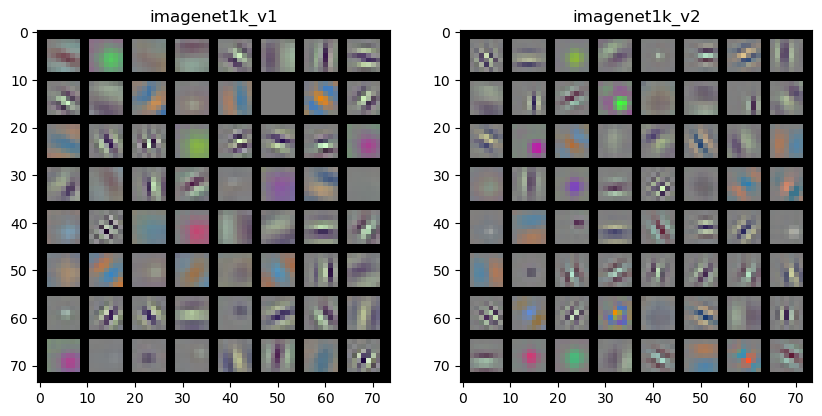

In [5]:
w1 = visualize_weights(resnet50_imagenet1)
w2 = visualize_weights(resnet50_imagenet2)


# visualize w1, w2
grid_size = len(w1)
x_grid = [w1[i] for i in range(grid_size)]
x_grid = torch.stack(x_grid, dim=0)
x_grid = torchvision.utils.make_grid(x_grid, nrow=8, padding=2)

axes, fig = plt.subplots(1, 2, figsize=(10, 10))
fig[0].imshow(x_grid.permute(1, 2, 0))
fig[0].set_title("imagenet1k_v1")

x_grid = [w2[i] for i in range(grid_size)]
x_grid = torch.stack(x_grid, dim=0)
x_grid = torchvision.utils.make_grid(x_grid, nrow=8, padding=2)

fig[1].imshow(x_grid.permute(1, 2, 0))
fig[1].set_title("imagenet1k_v2")

plt.show()